In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("./Downloads/otomoto_dataset/Car_sale_ads.csv")

In [3]:
df.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

   Transmission        Type Doors_number  Colour Origin_country First_owner  \
0        Manual  small_cars          3.0    gray            NaN         NaN   
1        Manual       coupe          2.0  silver            NaN         NaN   
2     Automatic  small_cars          3.0  silver            NaN         NaN   
3        Manual  small_cars          3.0    gray            NaN         NaN   
4        Manual  small_cars          3.0    blue            NaN         NaN   

  First_registration_date  Offer_publication_date  \
0                     NaN              04/05/2021   
1                     NaN              03/05/2021   
2                     NaN              03/05/2021   
3                     NaN              30/04/2021   
4                     NaN              30/04/2021   

                                      Offer_location  \
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...   
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...   
2                   Warszawa, Mazowieckie, Białołęka   
3                                  Jaworzno, Śląskie   
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...   

                                            Features  
0                                                 []  
1                                                 []  
2  ['ABS', 'Electric front windows', 'Drivers air...  
3  ['ABS', 'Electric front windows', 'Drivers air...  
4  ['ABS', 'Electrically adjustable mirrors', 'Pa...  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [5]:
df.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

In [6]:
df.isnull().sum().sum()

620618

<Axes: >

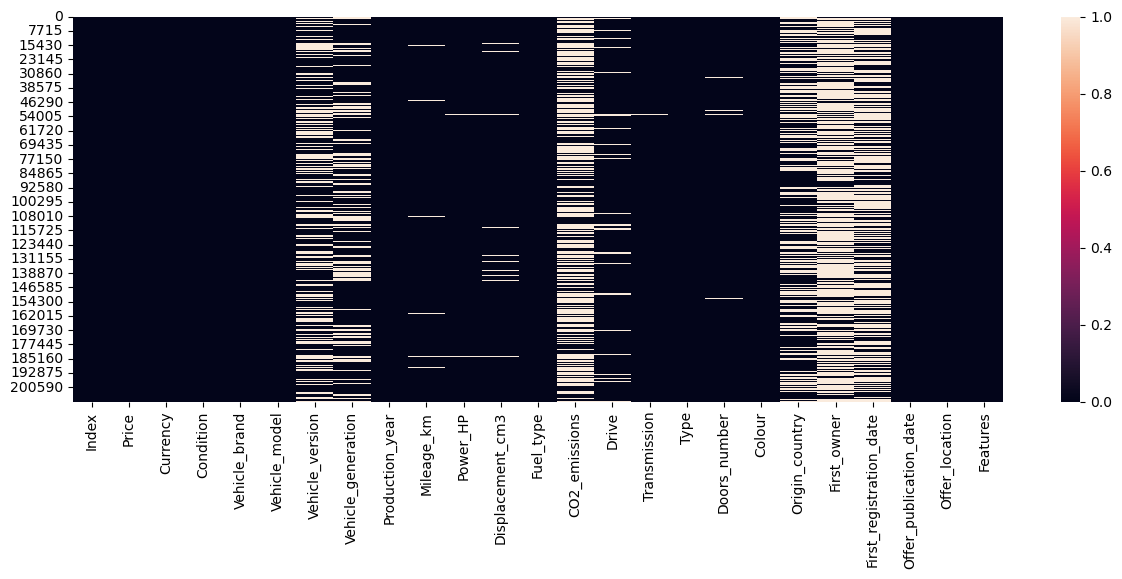

In [7]:
plt.figure(figsize=(15,5),dpi=100)
sns.heatmap(df.isnull())

# Sprawdzenie podstawowych statystyk

In [8]:
df.describe()

Index         Price  Production_year    Mileage_km  \
count  208304.000000  2.083040e+05    208304.000000  2.073210e+05   
mean   104151.500000  6.305383e+04      2012.098241  1.502768e+05   
std     60132.329574  8.665967e+04         6.998414  2.937447e+06   
min         0.000000  5.000000e+02      1915.000000  1.000000e+00   
25%     52075.750000  1.780000e+04      2008.000000  5.300000e+04   
50%    104151.500000  3.570000e+04      2013.000000  1.445660e+05   
75%    156227.250000  7.599000e+04      2017.000000  2.060000e+05   
max    208303.000000  6.999000e+06      2021.000000  1.111111e+09   

            Power_HP  Displacement_cm3  CO2_emissions   Doors_number  
count  207661.000000     206338.000000   9.404700e+04  206817.000000  
mean      151.836281       1882.567147   3.191564e+05       4.637138  
std        77.683546        729.609660   7.291396e+07       0.768559  
min         1.000000        400.000000   1.000000e+00       1.000000  
25%       105.000000       1461.000000   1.200000e+02       5.000000  
50%       136.000000       1798.000000   1.400000e+02       5.000000  
75%       172.000000       1997.000000   1.640000e+02       5.000000  
max      1398.000000       8400.000000   2.000000e+10      55.000000

In [9]:
df.describe().T

count           mean           std     min       25%  \
Index             208304.0  104151.500000  6.013233e+04     0.0  52075.75   
Price             208304.0   63053.833714  8.665967e+04   500.0  17800.00   
Production_year   208304.0    2012.098241  6.998414e+00  1915.0   2008.00   
Mileage_km        207321.0  150276.763960  2.937447e+06     1.0  53000.00   
Power_HP          207661.0     151.836281  7.768355e+01     1.0    105.00   
Displacement_cm3  206338.0    1882.567147  7.296097e+02   400.0   1461.00   
CO2_emissions      94047.0  319156.381107  7.291396e+07     1.0    120.00   
Doors_number      206817.0       4.637138  7.685590e-01     1.0      5.00   

                       50%        75%           max  
Index             104151.5  156227.25  2.083030e+05  
Price              35700.0   75990.00  6.999000e+06  
Production_year     2013.0    2017.00  2.021000e+03  
Mileage_km        144566.0  206000.00  1.111111e+09  
Power_HP             136.0     172.00  1.398000e+03  
Displacement_cm3    1798.0    1997.00  8.400000e+03  
CO2_emissions        140.0     164.00  2.000000e+10  
Doors_number           5.0       5.00  5.500000e+01

In [10]:
df.describe(include=['object']).T

count  unique  \
Currency                 208304       2   
Condition                208304       2   
Vehicle_brand            208304     108   
Vehicle_model            208304    1203   
Vehicle_version          138082   19056   
Vehicle_generation       147860     569   
Fuel_type                208304       8   
Drive                    193228       5   
Transmission             207825       2   
Type                     208304       9   
Colour                   208304      14   
Origin_country           118312      37   
First_owner               65094       1   
First_registration_date   86445    8441   
Offer_publication_date   208304      41   
Offer_location           208304   13635   
Features                 208304  177211   

                                                                   top    freq  
Currency                                                           PLN  208034  
Condition                                                         Used  182850  
Vehicle_brand                                               Volkswagen   18455  
Vehicle_model                                                    Astra    5302  
Vehicle_version                                                2.0 TDI     888  
Vehicle_generation                                          II (2012-)    3758  
Fuel_type                                                     Gasoline   99352  
Drive                                                     Front wheels  139944  
Transmission                                                    Manual  132889  
Type                                                               SUV   41587  
Colour                                                           black   50355  
Origin_country                                                  Poland   57127  
First_owner                                                        Yes   65094  
First_registration_date                                     01/01/2017     216  
Offer_publication_date                                      03/05/2021   26561  
Offer_location           Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)    1329  
Features                                                            []   13337

# Wstępna wizualizacja

<Axes: >

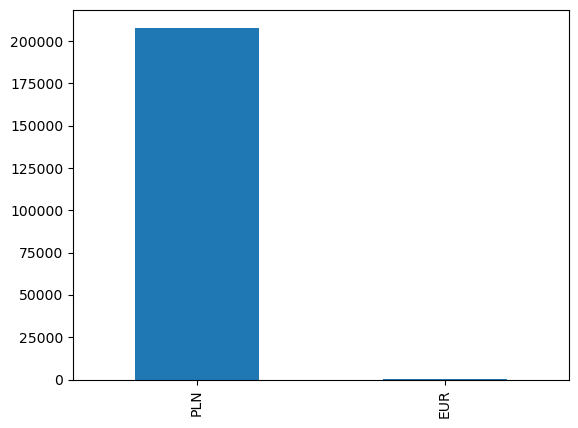

In [11]:
df['Currency'].value_counts().plot(kind='bar')

In [12]:
pln_oferty = df[df['Currency'].str.contains('PLN')]['Currency']
pln_ilosc = len(pln_oferty)
print(f"Liczba ofert w PLN: {pln_ilosc}")

eur_oferty = df[df['Currency'].str.contains('EUR')]['Currency']
eur_ilosc = len(eur_oferty)
print(f"Liczba ofert w EUR: {eur_ilosc}")

Liczba ofert w PLN: 208034
Liczba ofert w EUR: 270


<Axes: >

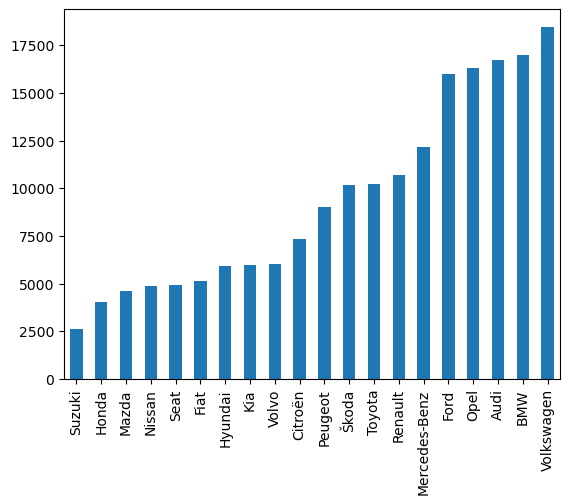

In [13]:
df['Vehicle_brand'].value_counts()[:20].sort_values(ascending=True).plot(kind='bar')

In [14]:
marki_top = df['Vehicle_brand'].value_counts()[:20].sort_values(ascending=True)
fig = px.bar(marki_top, x=marki_top.index, y=marki_top.values)
fig.update_layout(title='Top 20 - Marki Samochodów', xaxis_title='Marka', yaxis_title='Ilość')
fig.show()

C:\Users\janbo\AppData\Local\Temp\ipykernel_7664\2024922133.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



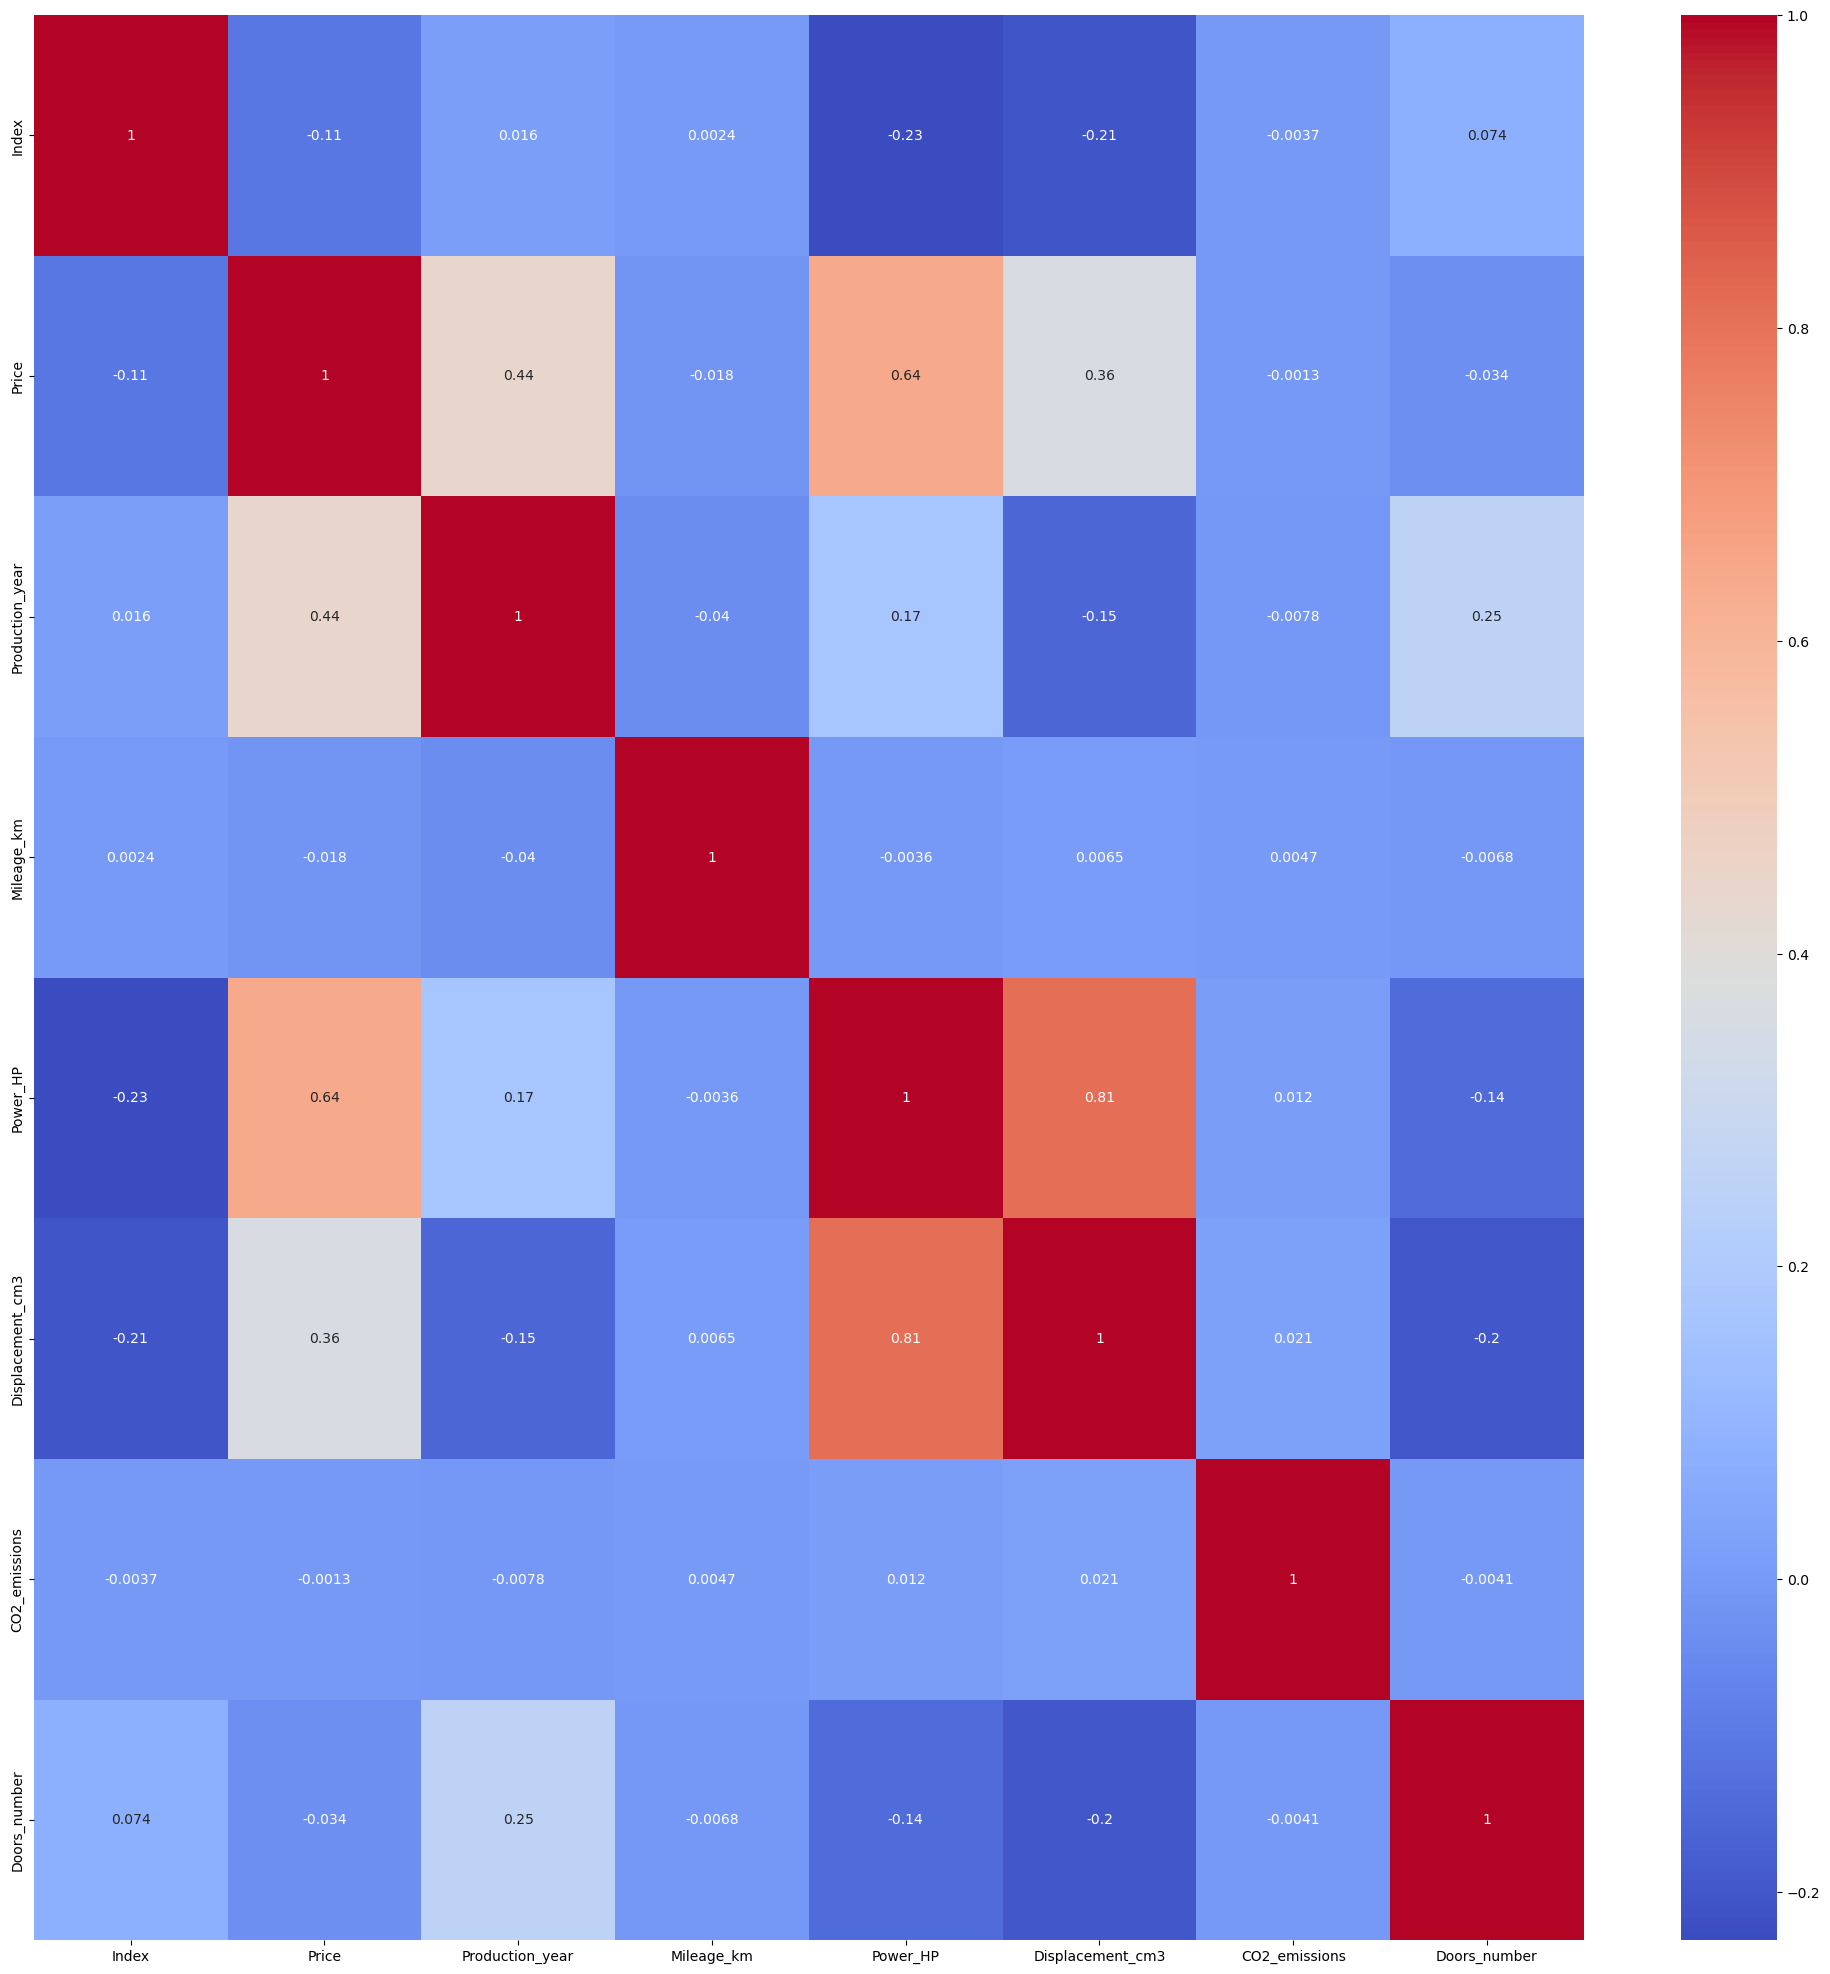

In [15]:
plt.figure(figsize = (25,25))
color_palette = 'coolwarm'
sns.heatmap(df.corr(),annot = True,cmap=color_palette)
plt.show()

<Axes: >

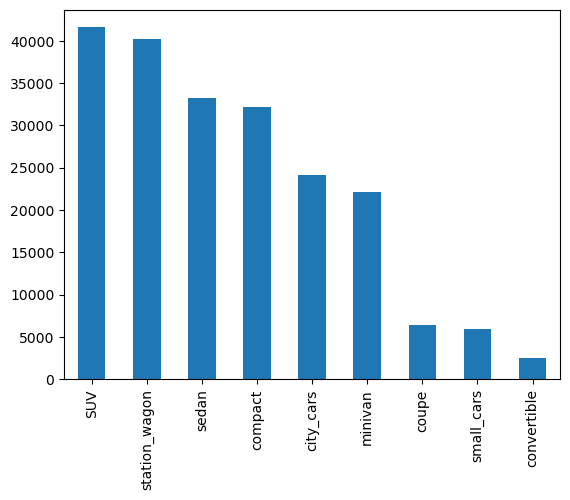

In [16]:
df['Type'].value_counts().plot(kind='bar')

In [17]:
df['Transmission'].value_counts()

Manual       132889
Automatic     74936
Name: Transmission, dtype: int64

In [18]:
df['Vehicle_brand'].value_counts()[:20].sort_values(ascending=True)

Suzuki            2634
Honda             4016
Mazda             4621
Nissan            4876
Seat              4907
Fiat              5145
Hyundai           5939
Kia               5978
Volvo             6016
Citroën           7349
Peugeot           9016
Škoda            10166
Toyota           10206
Renault          10702
Mercedes-Benz    12170
Ford             16007
Opel             16322
Audi             16730
BMW              16983
Volkswagen       18455
Name: Vehicle_brand, dtype: int64

### Grupowanie danych, by sprawdzić ilość wystąpień (na wykresach - dla lepszego zobrazowania) 

<Axes: xlabel='Power_HP'>

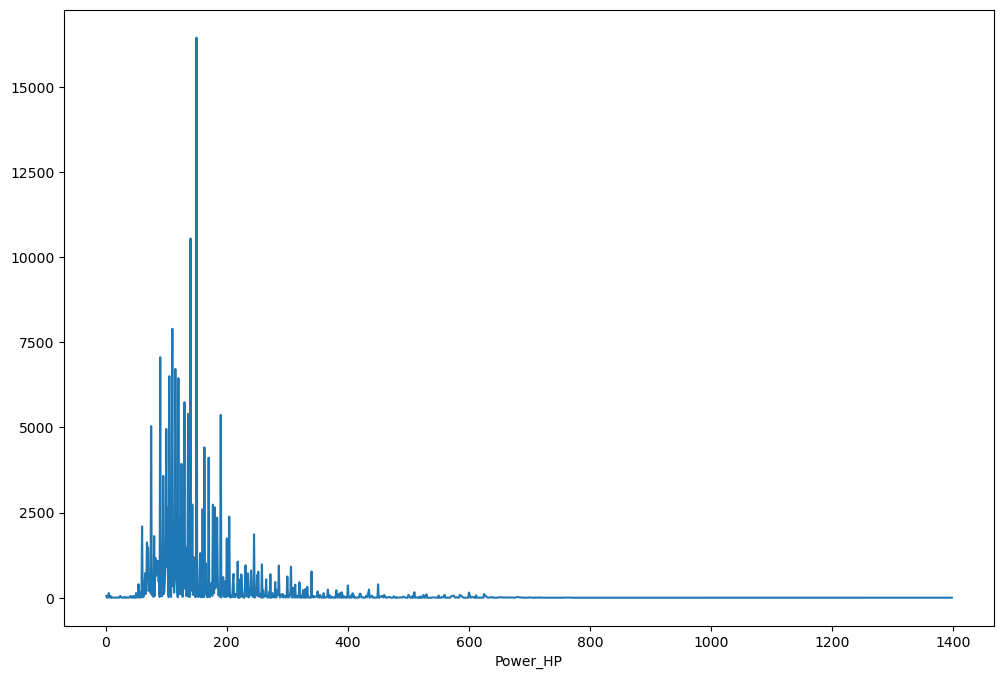

In [19]:
df.groupby('Power_HP')['Index'].count().plot(figsize=(12,8))

<Axes: xlabel='Displacement_cm3'>

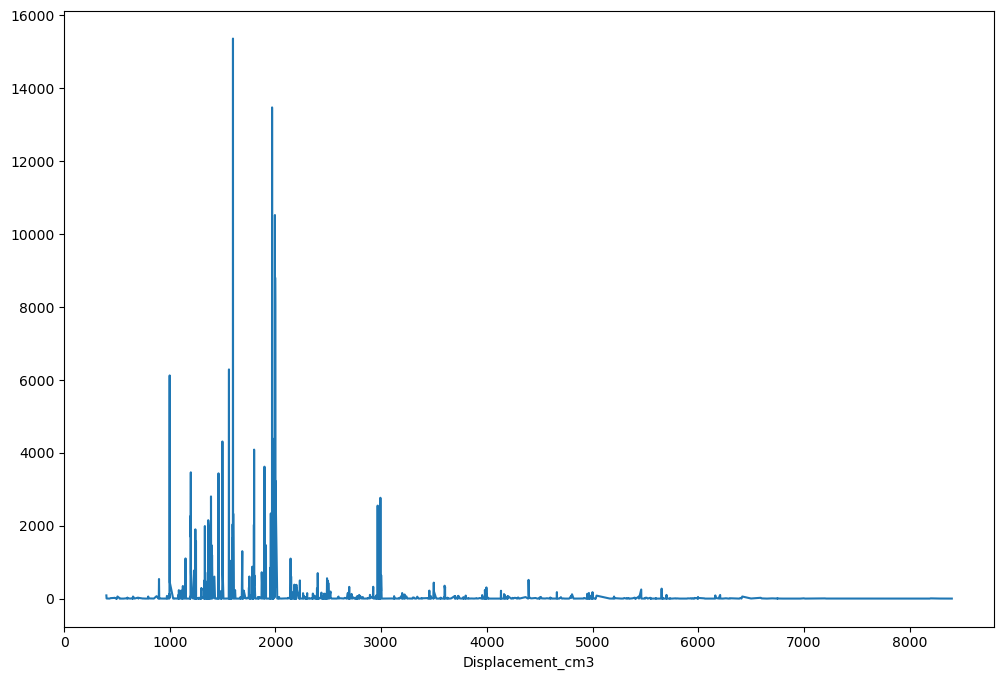

In [20]:
df.groupby('Displacement_cm3')['Index'].count().plot(figsize=(12,8))

<Axes: ylabel='Index'>

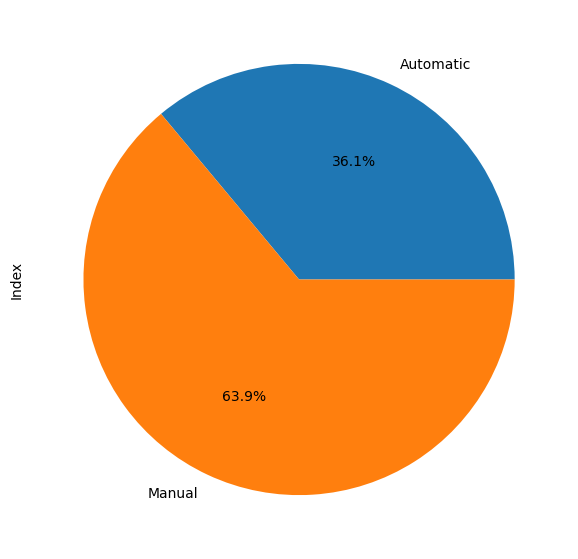

In [21]:
df.groupby('Transmission')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<Axes: ylabel='Index'>

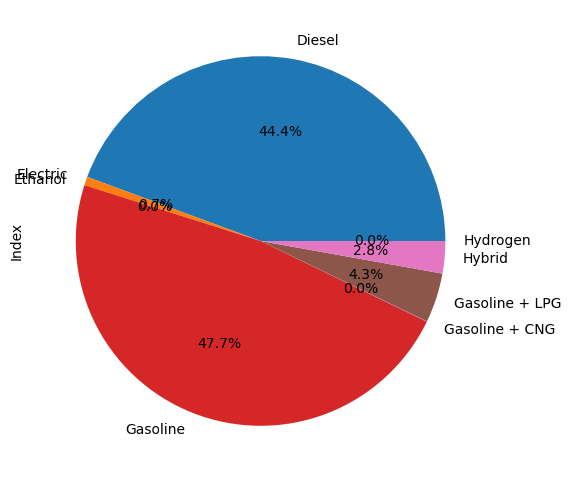

In [22]:
df.groupby('Fuel_type')['Index'].count().plot.pie(figsize=(10,6),autopct="%1.1f%%")

<Axes: ylabel='Index'>

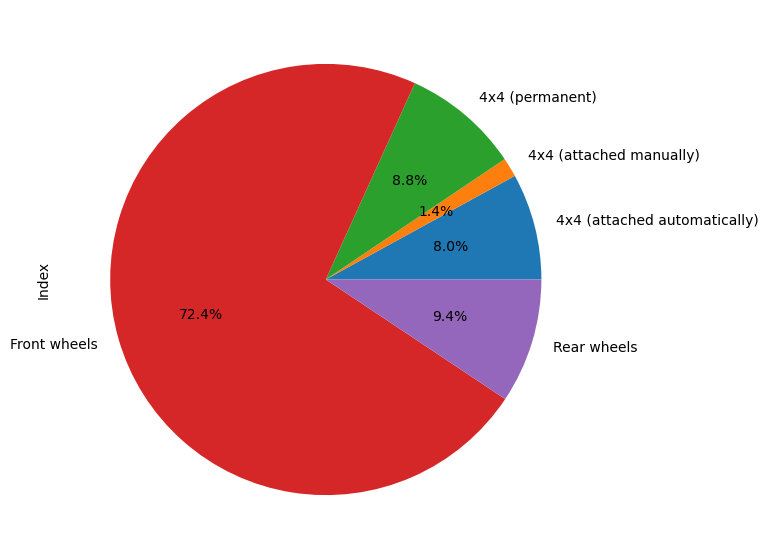

In [23]:
df.groupby('Drive')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<Axes: ylabel='Index'>

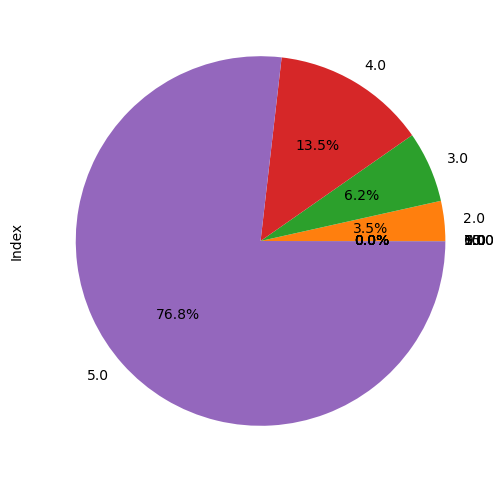

In [24]:
df.groupby('Doors_number')['Index'].count().plot.pie(figsize=(12,6),autopct="%1.1f%%")

In [25]:
df.groupby('Currency').count()

Index   Price  Condition  Vehicle_brand  Vehicle_model  \
Currency                                                            
EUR          270     270        270            270            270   
PLN       208034  208034     208034         208034         208034   

          Vehicle_version  Vehicle_generation  Production_year  Mileage_km  \
Currency                                                                     
EUR                   117                 106              270         270   
PLN                137965              147754           208034      207051   

          Power_HP  ...  Transmission    Type  Doors_number  Colour  \
Currency            ...                                               
EUR            267  ...           264     270           259     270   
PLN         207394  ...        207561  208034        206558  208034   

          Origin_country  First_owner  First_registration_date  \
Currency                                                         
EUR                  114           55                       58   
PLN               118198        65039                    86387   

          Offer_publication_date  Offer_location  Features  
Currency                                                    
EUR                          270             270       270  
PLN                       208034          208034    208034  

[2 rows x 24 columns]

### Boxplot - Cena vs Marka pojazdu

In [26]:
top_10_marek = df['Vehicle_brand'].value_counts().head(10).index.tolist()

<Figure size 1200x600 with 0 Axes>

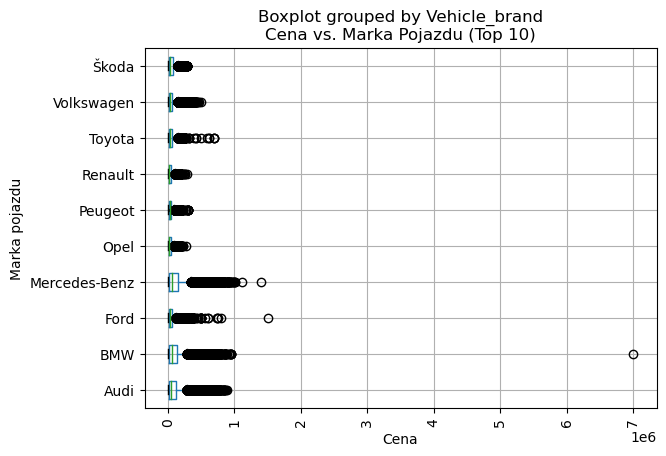

In [27]:
plt.figure(figsize=(12, 6))

filtered_data = df[df['Vehicle_brand'].isin(top_10_marek)]

filtered_data.boxplot(column='Price', by='Vehicle_brand', vert=False)

plt.title('Cena vs. Marka Pojazdu (Top 10)')
plt.xlabel('Cena')
plt.ylabel('Marka pojazdu')

plt.xticks(rotation=90)

plt.show()

In [28]:
# Widać że w marce BMW występuje outlier

### Plot - Moc vs. Cena 

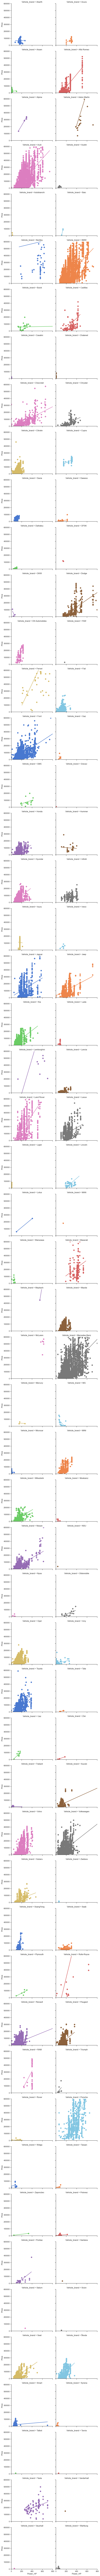

In [29]:
sns.set_theme(style="ticks")

# ustawienia podwykresów
# col_wrap=2: Określa, ile kolumn powinno być w każdym wierszu podwykresów.
# ci=None: Wyłącza wyświetlanie przedziału ufności na wykresach regresji liniowej

# scatter_kws definiuje ustawienia punktów na wykresie. "s" to rozmiar punktów, a "alpha" to poziom przeźroczystości punktów.
plot = sns.lmplot(x="Power_HP", y="Price", col="Vehicle_brand", hue="Vehicle_brand", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

plot.set(ylim=(0, 600000)) # żeby wykluczyć outliery z marki BMW 
plot.set(xlim=(0, 800)) # żeby wykluczyć outliery z marki Volkswagen 

plt.show()

### Plot - Rok produkcji vs. Cena 

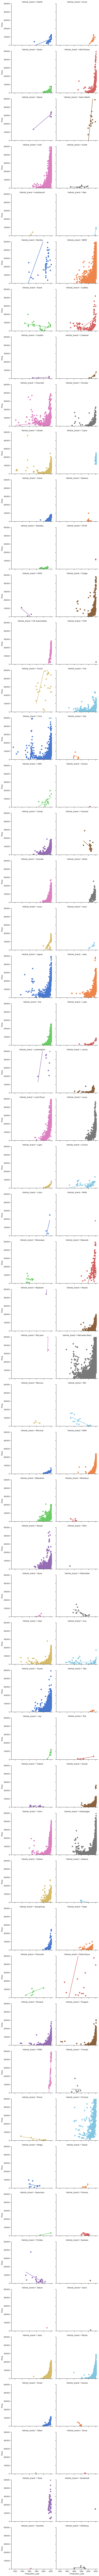

In [30]:
sns.set_theme(style="ticks")

# ustawienia podwykresów
# col_wrap=2: Określa, ile kolumn powinno być w każdym wierszu podwykresów.
# ci=None: Wyłącza wyświetlanie przedziału ufności na wykresach regresji liniowej

# scatter_kws definiuje ustawienia punktów na wykresie. "s" to rozmiar punktów, a "alpha" to poziom przeźroczystości punktów.
plot = sns.lmplot(x="Production_year", y="Price", col="Vehicle_brand", hue="Vehicle_brand", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

plot.set(ylim=(0, 500000)) # żeby wykluczyć outliery z marek BMW oraz Mercedes-benz

plt.show()

# Przetwarzanie danych pod rozwiązanie problemu biznesowego

In [31]:
# kolumna 'Currency' - wyeliminowanie wierszy w których występuje waluta EUR (jest ich tylko 270, pozostałe wiersze to PLN)

In [32]:
df = df[df['Currency'] != 'EUR']

In [33]:
df['Currency'].value_counts()

PLN    208034
Name: Currency, dtype: int64

In [34]:
# kolumna 'Condition' - usunięcie wierszy w których występuję stan pojazdu jako 'New' 
# w naszym problemie biznesowym skupiamy się na predykcji cen samochodów używanych

In [35]:
df = df[df['Condition'] != 'New']

In [36]:
df['Condition'].value_counts()

Used    182616
Name: Condition, dtype: int64

In [37]:
df.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
5      5  62950      PLN      Used        Abarth           595   
6      6  69900      PLN      Used        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
5             NaN                NaN             2016     46060.0  ...   
6             NaN                NaN             2021      2900.0  ...   

   Transmission        Type Doors_number  Colour Origin_country First_owner  \
1        Manual       coupe          2.0  silver            NaN         NaN   
2     Automatic  small_cars          3.0  silver            NaN         NaN   
3        Manual  small_cars          3.0    gray            NaN         NaN   
5        Manual  small_cars          3.0    gray        Germany         Yes   
6        Manual  small_cars          2.0   black        Germany         NaN   

  First_registration_date  Offer_publication_date  \
1                     NaN              03/05/2021   
2                     NaN              03/05/2021   
3                     NaN              30/04/2021   
5              15/03/2016              30/04/2021   
6              25/02/2021              29/04/2021   

                                      Offer_location  \
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...   
2                   Warszawa, Mazowieckie, Białołęka   
3                                  Jaworzno, Śląskie   
5  Modlińska 157 - 03-186 Warszawa, Białołęka (Po...   
6                             Żary, żarski, Lubuskie   

                                            Features  
1                                                 []  
2  ['ABS', 'Electric front windows', 'Drivers air...  
3  ['ABS', 'Electric front windows', 'Drivers air...  
5  ['ABS', 'Electric front windows', 'Drivers air...  
6                                                 []  

[5 rows x 25 columns]

### Wycięcie kolumn, które posłużą do stworzenia modelu (zmienne objaśniające oraz zmienna docelowa)

In [38]:
cols = ['Price','Production_year','Mileage_km','Power_HP','Displacement_cm3','Fuel_type', 'Transmission','Doors_number']

dfm = df.copy()
dfm = df[cols]

In [39]:
dfm.head()

Price  Production_year  Mileage_km  Power_HP  Displacement_cm3 Fuel_type  \
1  43500             1974     59000.0      75.0            1100.0  Gasoline   
2  44900             2018     52000.0     180.0            1368.0  Gasoline   
3  39900             2012     29000.0     160.0            1368.0  Gasoline   
5  62950             2016     46060.0     180.0            1368.0  Gasoline   
6  69900             2021      2900.0     145.0            1368.0  Gasoline   

  Transmission  Doors_number  
1       Manual           2.0  
2    Automatic           3.0  
3       Manual           3.0  
5       Manual           3.0  
6       Manual           2.0

In [40]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182616 entries, 1 to 208303
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             182616 non-null  int64  
 1   Production_year   182616 non-null  int64  
 2   Mileage_km        182616 non-null  float64
 3   Power_HP          182025 non-null  float64
 4   Displacement_cm3  181409 non-null  float64
 5   Fuel_type         182616 non-null  object 
 6   Transmission      182158 non-null  object 
 7   Doors_number      181411 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 12.5+ MB


In [41]:
dfm.isnull().sum()

Price                  0
Production_year        0
Mileage_km             0
Power_HP             591
Displacement_cm3    1207
Fuel_type              0
Transmission         458
Doors_number        1205
dtype: int64

In [42]:
# kolumna 'Power_HP' w celu pozbycia się braków, uzupełnienie danych średnią z tej kolumny

In [43]:
mean_power = dfm['Power_HP'].mean()
print(mean_power)

149.2513720642769


In [45]:
# Uzupełnienie braków w kolumnie 'Power_HP' średnią
dfm['Power_HP'].fillna(mean_power, inplace=True)

C:\Users\janbo\AppData\Local\Temp\ipykernel_7664\3833997778.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
dfm.isnull().sum()

Price                  0
Production_year        0
Mileage_km             0
Power_HP               0
Displacement_cm3    1207
Fuel_type              0
Transmission         458
Doors_number        1205
dtype: int64

In [47]:
#usunięcie wierszy z pozostałymi brakami 

In [48]:
dfm=dfm.dropna()

In [ ]:
# kolumna 'Doors_number' usunięcie outlierów

In [51]:
dfm['Doors_number'].value_counts()

5.0     136078
4.0      25123
3.0      12345
2.0       6837
6.0         31
7.0          8
1.0          3
55.0         2
9.0          1
Name: Doors_number, dtype: int64

In [52]:
# Usunięcie wierszy, które zawierają wartości 7.0, 1.0, 55.0, 9.0
dfm = dfm[~dfm['Doors_number'].isin([7.0, 1.0, 55.0, 9.0])]

In [ ]:
# kolumna 'Fuel_type'

In [54]:
dfm['Fuel_type'].value_counts()

Diesel            85615
Gasoline          82694
Gasoline + LPG     8558
Hybrid             3473
Gasoline + CNG       70
Hydrogen              2
Ethanol               2
Name: Fuel_type, dtype: int64

In [56]:
# Usunięcie wierszy, które zawierają wartości "Hydrogen" i "Ethanol"
dfm = dfm[~dfm['Fuel_type'].isin(['Hydrogen', 'Ethanol'])]

In [58]:
# kolumna 'Transmission'

In [55]:
dfm['Transmission'].value_counts()

Manual       121830
Automatic     58584
Name: Transmission, dtype: int64

### Zakodowanie zmiennych kategorycznych do modelu

In [59]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180410 entries, 1 to 208303
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             180410 non-null  int64  
 1   Production_year   180410 non-null  int64  
 2   Mileage_km        180410 non-null  float64
 3   Power_HP          180410 non-null  float64
 4   Displacement_cm3  180410 non-null  float64
 5   Fuel_type         180410 non-null  object 
 6   Transmission      180410 non-null  object 
 7   Doors_number      180410 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 12.4+ MB


In [60]:
dfm=pd.get_dummies(dfm, drop_first=True)

### Zapisanie kopii naszych wyczyszczonych danych

In [61]:
dfm.to_csv('df_cleaned.csv')

### Przygotowanie danych do modelu

In [62]:
X = dfm.copy()
y = X.pop('Price')

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nStosunek zbioru X_test do całości: {len(X_test) / len(dfm):.2f}')

X_train shape (144328, 10)
y_train shape (144328,)
X_test shape (36082, 10)
y_test shape (36082,)

Stosunek zbioru X_test do całości: 0.20


### Przeprowadzenie standaryzacji danych -  w celu wyrównania zakresów różnych wartości w danych kolumnach, żeby poprawić wyniki modelu oraz przyspieszyć uczenie

In [69]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_sc=pd.DataFrame(scaler.fit_transform(X_train))
X_test_sc=pd.DataFrame(scaler.transform(X_test))

# Modele 

### model_1 - Las Losowy podstawowe parametry

In [70]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)

In [71]:
print(reg_score)

0.8539175282405703


### model_2 - Las Losowy z wykorzystaniem GridSearch w celu znalezienia najlepszych parametrów do modelu

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor()

scoring = {
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'rmse': make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred, squared=False), greater_is_better=False)
}


param_grid = [{'n_estimators': [50, 100],
               'max_depth': [3,4,5,6,8,10,15],
               'min_samples_split' : [3,4,6,8,10,15],
               'min_samples_leaf': [3,4,6,8,10,15]}]

gs = GridSearchCV(model, param_grid = param_grid, scoring= scoring, refit='r2', cv=5)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [3, 4, 5, 6, 8, 10, 15],
                          'min_samples_leaf': [3, 4, 6, 8, 10, 15],
                          'min_samples_split': [3, 4, 6, 8, 10, 15],
                          'n_estimators': [50, 100]}],
             refit='r2',
             scoring={'mae': make_scorer(mean_absolute_error, greater_is_better=False),
                      'r2': make_scorer(r2_score),
                      'rmse': make_scorer(<lambda>, greater_is_better=False)})

In [81]:
gs_score = gs.score(X_test, y_test)

In [82]:
print(gs_score)

0.8641277972013766


In [83]:
model = gs.best_estimator_

In [84]:
print(model)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=6)


#### model_2 - wyświetlenie najlepszych parametrów i wyników dla różnych scoringów

In [87]:
print("Najlepsze parametry modelu:")
print(gs.best_params_)
print("\nWyniki dla różnych scoringów:")
for scorer, score in gs.scorer_.items():
    print(f"{scorer}: {score(gs.best_estimator_, X_train, y_train)}")

Najlepsze parametry modelu:
{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}

Wyniki dla różnych scoringów:
r2: 0.8841995889158308
mae: -7762.5355951648135
rmse: 23170.84745187614


In [ ]:
# poniżej dla zbioru testowego

In [88]:
for scorer, score in gs.scorer_.items():
    print(f"{scorer}: {score(gs.best_estimator_, X_test, y_test)}")

r2: 0.8641277972013766
mae: -9599.74769441163
rmse: 25012.822074529624


### model_3 - XGBoost

In [89]:
import xgboost as xgb

In [102]:
model3 = xgb.XGBRegressor(
    objective="reg:squarederror",  #funkcja celu regresji
    n_estimators=100,  
    learning_rate=0.1,  
    max_depth=5,  
    random_state=42  
)

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

# metryki
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # RMSE to pierwiastek kwadratowy z MSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 561356187.1788597
Root Mean Squared Error (RMSE): 23692.956488772346
R-squared (R^2): 0.8780887617366595


### model_4 - XGBoost - zwiększone wartości parametrów

In [115]:
model4 = xgb.XGBRegressor(
    objective="reg:squarederror",  # funkcja celu regresji
    n_estimators=200,  # zwiększenie liczby drzew w modelu
    learning_rate=0.1,
    max_depth=7,  # zwiększenie głębokości
    random_state=42  
)

model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

# metryki
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # RMSE to pierwiastek kwadratowy z MSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 559866551.0895402
Root Mean Squared Error (RMSE): 23661.49934153667
R-squared (R^2): 0.8784122700266872


In [118]:
print(model4)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


### Zapisanie modelu do postaci binarnej

In [119]:
import pickle

In [120]:
with open('model4.pickle', 'wb') as file:
    pickle.dump(model4, file)